### Importing the necessary libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string


### Importing the data


In [20]:
data = pd.read_csv('spam.tsv',sep='\t')
data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


## EDA

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [25]:
data.shape

(5572, 4)

We have 5572 records

In [28]:
#checking for missing values
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

No records have missing values

In [41]:
#checking for duplicate records
duplicate=data[data.duplicated()]
duplicate.shape


(403, 4)

403 Duplicate records were found

In [50]:
data.drop_duplicates(inplace=True)
data.shape

(5169, 4)

After dropping the Duplicate records, we have 5169 records



In [62]:
#checking the number of spam and ham messages we have in our dataset
data['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


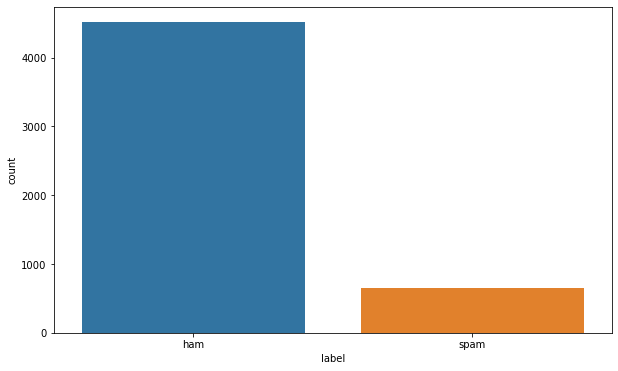

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data['label'])
plt.show()

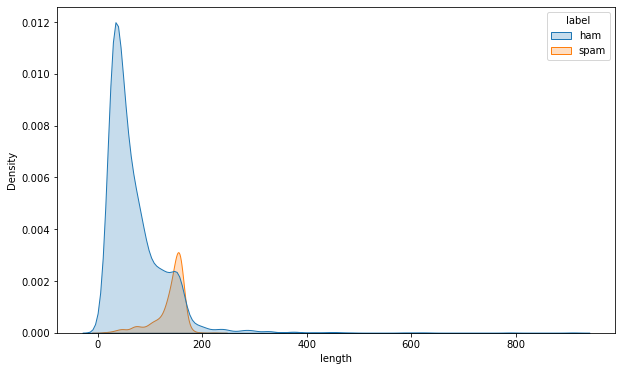

In [64]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=data['length'],hue=data['label'],shade=True)
plt.show()

As we can see that the Spam messages ranges between 100-200 characters and the majority of Non-Spam messages ranges between 0-100 characters. 

## Text Pre-Processing


In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [166]:
#Function to clean the data
stop_words=stopwords.words('english')
lemmatizer=WordNetLemmatizer()
punctuation=string.punctuation

exclude=punctuation
def clean_text(text):
    text=text.lower()
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=text.translate(text.maketrans('', '', exclude))
    text=nltk.word_tokenize(text)
    text=[lemmatizer.lemmatize(word,pos='v') for word in text if word not in stop_words]
    text=' '.join(text).strip()
    return text

  

In [167]:
data['message']=data['message'].apply(clean_text)
data

,label,message,length,punct
0,ham,go jurong point crazy available bugis n great ...,111,9
1,ham,ok lar joke wif u oni,29,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah nt think go usf live around though,61,2
...,...,...,...,...
5567,spam,2nd time try 2 contact u u £750 pound prize 2 ...,160,8
5568,ham,ü b go esplanade fr home,36,1
5569,ham,pity mood suggestions,57,7
5570,ham,guy bitch act like interest buy something else...,125,1


## Data Visualization

In [168]:
#Visualization of the words 

spam=data[data['label']=='spam']
ham=data[data['label']=='ham']



(-0.5, 1499.5, 799.5, -0.5)

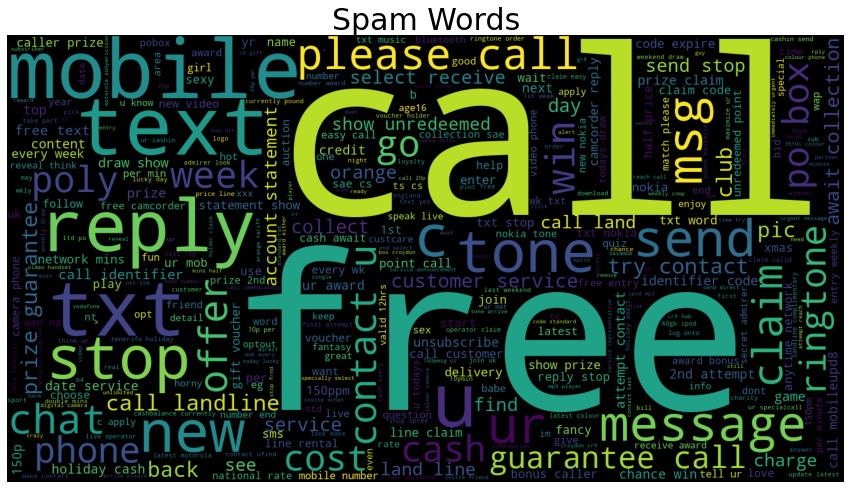

In [164]:
#Word cloud for Spam Words
from wordcloud import WordCloud

text=''.join(spam['message'])

plt.figure(figsize=(15,12))
wordcloud=WordCloud(max_words=500, height= 800, width = 1500,min_font_size=10).generate(text)
plt.title('Spam Words',fontsize=30)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1499.5, 799.5, -0.5)

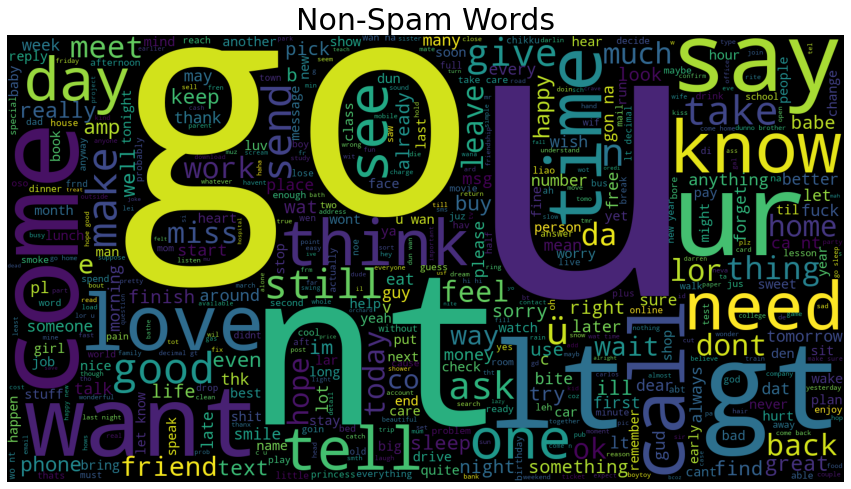

In [169]:
#Word Cloud for ham words
text=''.join(ham['message'])

plt.figure(figsize=(15,12))
wordcloud=WordCloud(max_words=500,width=1500,height=800,min_font_size=10).generate(text)
plt.imshow(wordcloud)
plt.title('Non-Spam Words',fontsize=30)
plt.axis('off')





In [192]:
#Frequently used Spam words
from collections import Counter
spam_words=[]
for sent in spam['message'].to_list():
    for word in sent.split():
        spam_words.append(word)
    
spam_counter=Counter(spam_words)

spam_df=pd.DataFrame(spam_counter.most_common(30),columns=['Word','Frequency'])
spam_df

,Word,Frequency
0,call,321
1,free,191
2,2,157
3,u,136
4,txt,130
5,ur,119
6,stop,108
7,mobile,105
8,text,104
9,reply,103


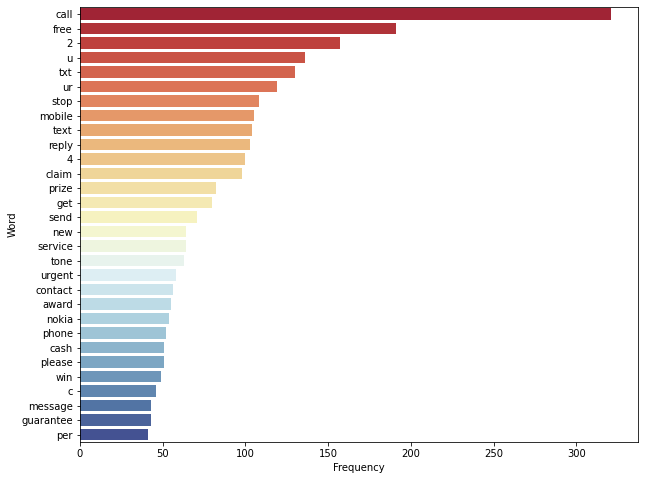

In [191]:
#Visual Representation of the most used Spam words
plt.figure(figsize=(10,8))
sns.barplot(data=spam_df,y='Word',x='Frequency',palette='RdYlBu')

In [171]:
#Frequently used Ham words

ham_words=[]
for sent in ham['message'].to_list():
    for word in sent.split():
        ham_words.append(word)
ham_counter=Counter(ham_words)
ham_df=pd.DataFrame(ham_counter.most_common(30),columns=['Word','Frequency'])
ham_df

,Word,Frequency
0,u,919
1,get,594
2,go,498
3,nt,355
4,come,301
5,2,294
6,gt,288
7,lt,287
8,ok,252
9,know,249


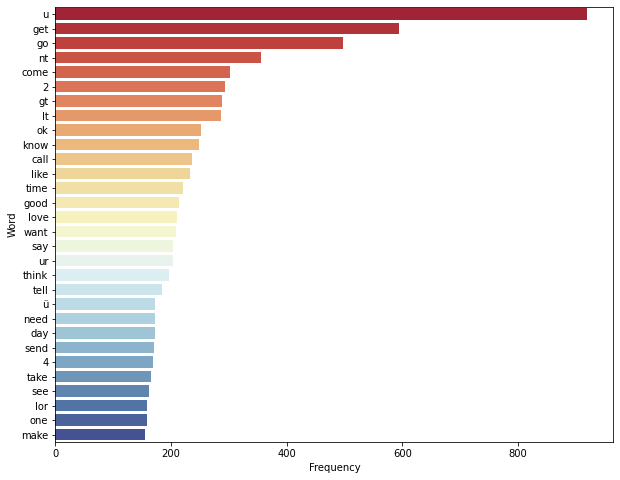

In [194]:
#Visual Representation of the most used Ham words
plt.figure(figsize=(10,8))
sns.barplot(data=ham_df,y='Word',x='Frequency',palette='RdYlBu')


### Splitting of the Data

In [203]:
#Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data['message'],data['label'],test_size=0.25,random_state=101)


## Model Building


In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Function for a pipeline consisting of a TfidfVectorizer and a machine learning model:
def model_pipeline(model,**kwargs):
    pipeline=Pipeline([('Tf-Idf',TfidfVectorizer()),(f'{model}',model(**kwargs))])
    return pipeline

### Logistic Regression


In [273]:
from sklearn.linear_model import LogisticRegression
LR_model=model_pipeline(LogisticRegression)
LR_model.fit(xtrain,ytrain)

Pipeline(steps=[('Tf-Idf', TfidfVectorizer()),
                ("<class 'sklearn.linear_model._logistic.LogisticRegression'>",
                 LogisticRegression())])

#### Prediction


In [267]:
ypred=LR_model.predict(xtest)
ypred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

#### Performance Metrics 


Classification report: 
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1115
        spam       0.96      0.77      0.85       178

    accuracy                           0.96      1293
   macro avg       0.96      0.88      0.92      1293
weighted avg       0.96      0.96      0.96      1293



***************************************************************************


Accuracy score:  0.9636504253673627


***************************************************************************


Confusion Matrix: 


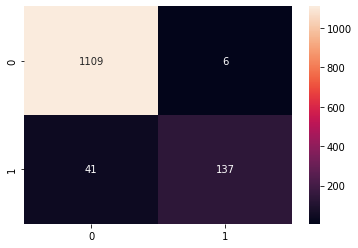

In [312]:
print('Classification report: ')
print(classification_report(ytest,ypred))
print('\n')
print('*' * 75)
print('\n')
print('Accuracy score: ',accuracy_score(ytest,ypred))
print('\n')
print('*' * 75)
print('\n')
print('Confusion Matrix: ')
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

### Naive Bayes Classifier


In [274]:
from sklearn.naive_bayes import MultinomialNB
NB_Model=model_pipeline(MultinomialNB)
NB_Model.fit(xtrain,ytrain)

Pipeline(steps=[('Tf-Idf', TfidfVectorizer()),
                ("<class 'sklearn.naive_bayes.MultinomialNB'>",
                 MultinomialNB())])

#### Prediction


In [275]:
y_pred=NB_Model.predict(xtest)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

#### Performance Metrics 


Classification report: 
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1115
        spam       0.99      0.71      0.83       178

    accuracy                           0.96      1293
   macro avg       0.97      0.85      0.90      1293
weighted avg       0.96      0.96      0.96      1293



***************************************************************************


Accuracy score:  0.9590100541376644


***************************************************************************


Confusion Matrix: 


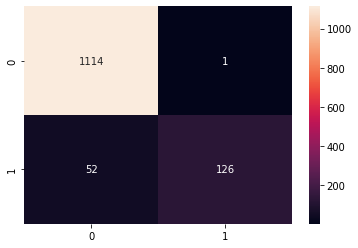

In [310]:
print('Classification report: ')
print(classification_report(ytest,y_pred))
print('\n')
print('*' * 75)
print('\n')
print('Accuracy score: ',accuracy_score(ytest,y_pred))
print('\n')
print('*' * 75)
print('\n')
print('Confusion Matrix: ')
cm=confusion_matrix(ytest,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

### Random Forest Classifier


In [279]:
from sklearn.ensemble import RandomForestClassifier
RF_model=model_pipeline(RandomForestClassifier)
RF_model.fit(xtrain,ytrain)


Pipeline(steps=[('Tf-Idf', TfidfVectorizer()),
                ("<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
                 RandomForestClassifier())])

#### Prediction


In [280]:
y_pred_=RF_model.predict(xtest)
y_pred_


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

#### Performance Metrics 


Classification report: 
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1115
        spam       0.99      0.84      0.91       178

    accuracy                           0.98      1293
   macro avg       0.98      0.92      0.95      1293
weighted avg       0.98      0.98      0.98      1293



***************************************************************************


Accuracy score:  0.9775715390564579


***************************************************************************


Confusion Matrix: 


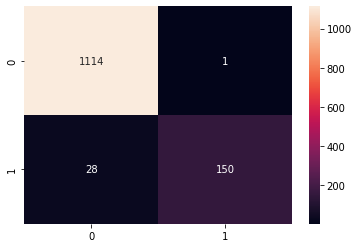

In [309]:
#Performance Metrics 
print('Classification report: ')
print(classification_report(ytest,y_pred_))
print('\n')
print('*' * 75)
print('\n')
print('Accuracy score: ',accuracy_score(ytest,y_pred_))
print('\n')
print('*' * 75)
print('\n')
print('Confusion Matrix: ')
cm=confusion_matrix(ytest,y_pred_)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

### Support Vector Machine


In [285]:
from sklearn.svm import SVC
SVC_model=model_pipeline(SVC)
SVC_model.fit(xtrain,ytrain)


Pipeline(steps=[('Tf-Idf', TfidfVectorizer()),
                ("<class 'sklearn.svm._classes.SVC'>", SVC())])

#### Prediction


In [286]:
ypred_=SVC_model.predict(xtest)
ypred_


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

#### Performance Metrics 


Classification report: 
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1115
        spam       0.99      0.86      0.92       178

    accuracy                           0.98      1293
   macro avg       0.99      0.93      0.96      1293
weighted avg       0.98      0.98      0.98      1293



***************************************************************************


Accuracy score:  0.979891724671307


***************************************************************************


Confusion Matrix: 


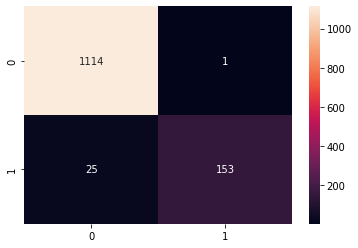

In [308]:
print('Classification report: ')
print(classification_report(ytest,ypred_))
print('\n')
print('*' * 75)
print('\n')
print('Accuracy score: ',accuracy_score(ytest,ypred_))
print('\n')
print('*' * 75)
print('\n')
print('Confusion Matrix: ')
cm=confusion_matrix(ytest,ypred_)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

### Checking the Model Performance


In [297]:
message1=['Hi, Hope you are doing well']
message2=['Please contact me ASAP, there is an emergency']
message3=['This is your LUCKY DAY. You have won a free trip to Paris.Click here to unlock prize']

pred1=SVC_model.predict(message1)
pred2=SVC_model.predict(message2)
pred3=SVC_model.predict(message3)

print(pred1)
print(pred2)
print(pred3)


['ham']
['ham']
['spam']


The Model was able to identify the spam message sucessfully.

## Conclusion

#### The accuracy of the models were found to be as follows:

##### Logistic Regression: 96.36%

##### MultinomialNB Classifier: 95.9%

##### Random Forest Classifier: 97.75%

##### SVC: 97.98%

SVC has performed the best of all the models with an accuracy of almost 98%


### Saving the model


In [290]:
import joblib
joblib.dump(SVC_model,'SVC_SPAM_CLASSIFIER.pkl')

['SVC_SPAM_CLASSIFIER.pkl']